<a href="https://colab.research.google.com/github/lrc9859/Git-Assignment/blob/master/PyTorch_Autograd_and_MLP_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Intro

_Adapted from Justin Johnson's Tutorial:_
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples

This tutorial introduces the fundamental concepts of PyTorch through self-contained examples.

At its core, PyTorch provides two main features:

- An n-dimensional Tensor, similar to numpy but can run on GPUs
- Automatic differentiation for building and training neural networks

We will use a problem of fitting `y=sin(x)` with a third order polynomial as our running example. The network will have four parameters, and will be trained with gradient descent to fit random data by minimizing the Euclidean distance between the network output and the true output.

## Setup

In [ ]:
!pip install torchviz

import numpy as np
import math
import random
import matplotlib.pyplot as plt
from datetime import datetime
import torch
from torchviz import make_dot

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=816d10f363a3ea936af10d1bf4d13c1d8762a888a1fcc975be77b0680808086d
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


## Tensors

### Warm-up: numpy

Before introducing PyTorch, we will first implement the network using numpy.

Numpy provides an n-dimensional array object, and many functions for manipulating these arrays. Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients. However we can easily use numpy to fit a third order polynomial to sine function by manually implementing the forward and backward passes through the network using numpy operations:

In [ ]:
x = np.linspace(6, 10, 10)
x

array([ 6.        ,  6.44444444,  6.88888889,  7.33333333,  7.77777778,
        8.22222222,  8.66666667,  9.11111111,  9.55555556, 10.        ])


Trained in 0:00:08.533402


Result: y = -7.96442352821522e-05 + 0.8567214798455824 x + 1.373995587196707e-05 x^2 + -0.0933276347900036 x^3



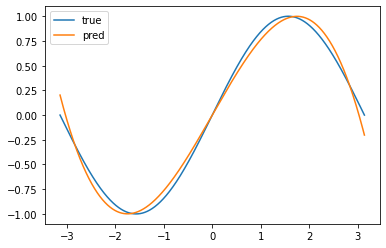

In [ ]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-3

start_time = datetime.now()
for t in range(20000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3

    y_pred = a + b*x + c*x**2 + d*x**3

    # Compute and print loss
    loss = np.mean(0.5*(y - y_pred)**2)

    # Backprop to compute gradients of loss with respect to a, b, c, d
    grad_y_pred = y_pred - y
    grad_a = np.mean(grad_y_pred)
    grad_b = np.mean(grad_y_pred * x)
    grad_c = np.mean(grad_y_pred * x**2)
    grad_d = np.mean(grad_y_pred * x**3)

    # Update weights
    a = a - learning_rate * grad_a
    b = b - learning_rate * grad_b
    c = c - learning_rate * grad_c
    d = d - learning_rate * grad_d

print(f"\nTrained in {datetime.now() - start_time}\n")
print(f'\nResult: y = {a} + {b} x + {c} x^2 + {d} x^3\n')

plt.plot(x, y, label="true")
plt.plot(x, a + b*x + c*(x**2) + d * (x**3), label="pred")
plt.legend()

### PyTorch: Tensors

Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

Here we introduce the most fundamental PyTorch concept: the Tensor. A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to specify the correct device.

Here we use PyTorch Tensors to fit a third order polynomial to sine function. Like the numpy example above we need to manually implement the forward and backward passes through the network:


Trained in 0:00:02.922794


Result: y = 0.0001716128463158384 + 0.8566833734512329 x + -2.960550773423165e-05 x^2 + -0.09332221746444702 x^3



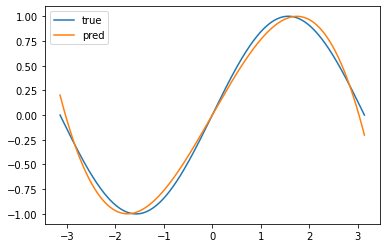

In [ ]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-3

start_time = datetime.now()
for t in range(20000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3

    y_pred = a + b*x + c*x**2 + d*x**3

    # Compute and print loss
    loss = torch.mean(0.5*(y - y_pred)**2)

    # Backprop to compute gradients of loss with respect to a, b, c, d
    grad_y_pred = y_pred - y
    grad_a = torch.mean(grad_y_pred)
    grad_b = torch.mean(grad_y_pred * x)
    grad_c = torch.mean(grad_y_pred * x**2)
    grad_d = torch.mean(grad_y_pred * x**3)

    # Update weights
    a = a - learning_rate * grad_a
    b = b - learning_rate * grad_b
    c = c - learning_rate * grad_c
    d = d - learning_rate * grad_d

print(f"\nTrained in {datetime.now() - start_time}\n")
print(f'\nResult: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3\n')

plt.plot(x.cpu(), y.cpu(), label="true")
plt.plot(x.cpu(), a.cpu() + b.cpu()*x + c.cpu()*(x**2) + d.cpu() * (x**3), label="pred")
plt.legend()

### Performance comparison

_Make sure you are connected to a GPU when running this cell_

In [ ]:
import numpy as np
import torch

numpy_mat = np.random.rand(1000, 1000) * 100
torch_no_gpu_mat = torch.rand(1000, 1000) * 100
torch_gpu_mat = torch.rand(1000, 1000).to(torch.device("cuda")) * 100

print("Matrix mutliplication in numpy -")
%timeit numpy_mat ** 2

print("\nMatrix mutliplication in torch without GPU -")
%timeit torch_no_gpu_mat ** 2

print("\nMatrix mutliplication in torch with GPU -")
%timeit torch_gpu_mat ** 2

Matrix mutliplication in numpy -
The slowest run took 4.25 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 893 µs per loop

Matrix mutliplication in torch without GPU -
1000 loops, best of 5: 635 µs per loop

Matrix mutliplication in torch with GPU -
The slowest run took 158.27 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 54.2 µs per loop


## Autograd

### PyTorch: Tensors and autograd

In the above examples, we had to manually implement both the forward and backward passes of our neural network. Manually implementing the backward pass is not a big deal for a small two-layer network, but can quickly get very hairy for large complex networks.

Thankfully, we can use automatic differentiation to automate the computation of backward passes in neural networks. The autograd package in PyTorch provides exactly this functionality. When using autograd, the forward pass of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

This sounds complicated, it’s pretty simple to use in practice. Each Tensor represents a node in a computational graph. If x is a Tensor that has x.requires_grad=True then x.grad is another Tensor holding the gradient of x with respect to some scalar value.

Take the following example that implementes 2x^2

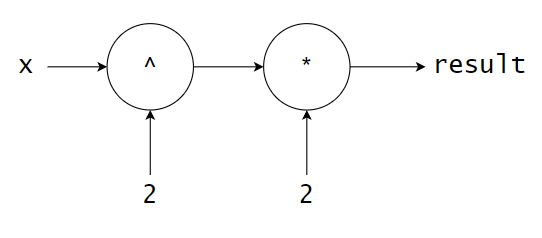

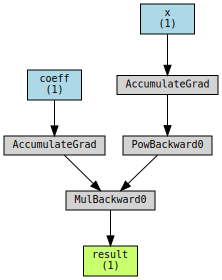

In [ ]:
from torch.autograd import Variable

x = torch.tensor([2.0], requires_grad=True)
coeff = torch.tensor([2.0], requires_grad=True)
temp = x**2
result = coeff * temp

make_dot(result, params={k: v for k, v in locals().items() if isinstance(v, Variable)})

In [ ]:
temp.grad_fn(result.grad_fn(torch.tensor([1.0]))[1])

tensor([8.], grad_fn=<MulBackward0>)

In [ ]:
torch.autograd.grad(result, x)

(tensor([8.]),)

In [ ]:
a = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([2.0], requires_grad=True)

c = a * b

c.grad_fn(torch.tensor([2.0]))

(tensor([4.], grad_fn=<MulBackward0>), tensor([2.], grad_fn=<MulBackward0>))

In [ ]:
c.backward()

a.grad

tensor([2.])

We can use this to perform simple *gradient descent*:

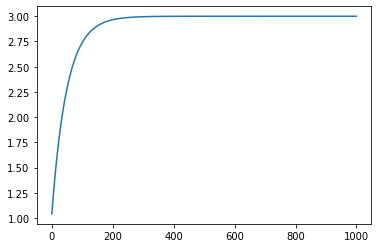

In [ ]:
learning_rate = 0.01
x = torch.tensor([1.0], requires_grad=True)

xs = []

for i in range(1000):
    # forward pass through quadratic
    y = x**2 - 6*x + 4  

    # compute gradient 
    grad = torch.autograd.grad(y, x)[0]

    # update x
    x = x - learning_rate*grad

    xs.append(x.item())

plt.plot(xs)

As a more involved example, consider the following computational graph and try to implement it in PyTorch:

(Adapated from the [DL Neuromatch Tutorial](https://deeplearning.neuromatch.io/tutorials/W1D2_LinearDeepLearning/student/W1D2_Tutorial1.html#video-4-auto-differentiation))

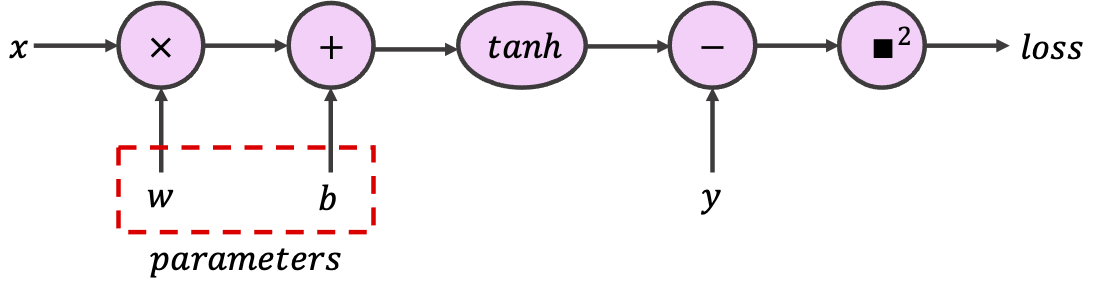

initial weight = -0.5, 
initial bias = 0.5
for x=1.0 and y=7.0, prediction=0.0, and L2 Loss = 24.5


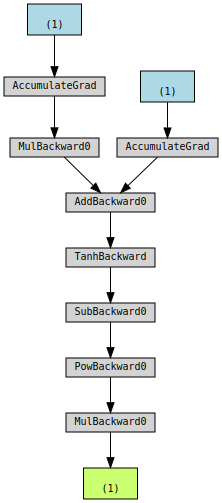

In [ ]:
class SimpleGraph:
    def __init__(self, w, b):
        """Initializing the SimpleGraph

        Args:
            w (float): initial value for weight
            b (float): initial value for bias
        """

        self.w = torch.tensor([w], requires_grad=True)
        self.b = torch.tensor([b], requires_grad=True)

    def forward(self, x):
        """Forward pass

        Args:
            x (torch.Tensor): 1D tensor of features

        Returns:
            torch.Tensor: model predictions
        """
        # Implement the the forward pass to calculate prediction
        # Note that prediction is not the loss, but the value after `tanh`

        prediction = torch.tanh(self.w * x + self.b)

        return prediction


def sq_loss(y_true, y_prediction):
    """L2 loss function

    Args:
        y_true (torch.Tensor): 1D tensor of target labels
        y_prediction (torch.Tensor): 1D tensor of predictions

    Returns:
        torch.Tensor: L2-loss (squared error)
    """
    # Implement the L2-loss (squred error) given true label and prediction

    loss = 0.5*(y_true - y_prediction)**2

    return loss


feature = torch.tensor([1.0])  # input tensor
target = torch.tensor([7.0])  # target tensor

simple_graph = SimpleGraph(-0.5, 0.5)
print(f"initial weight = {simple_graph.w.item()}, "
      f"\ninitial bias = {simple_graph.b.item()}")

prediction = simple_graph.forward(feature)
square_loss = sq_loss(target, prediction)

print(f"for x={feature.item()} and y={target.item()}, "
      f"prediction={prediction.item()}, and L2 Loss = {square_loss.item()}")

make_dot(square_loss)


Next we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example; now we no longer need to manually implement the backward pass through the network.


Trained in 0:00:05.119125


Result: y = 3.636584011701416e-08 + 0.8567122220993042 x + -1.1276231504098178e-08 x^2 + -0.09332632273435593 x^3



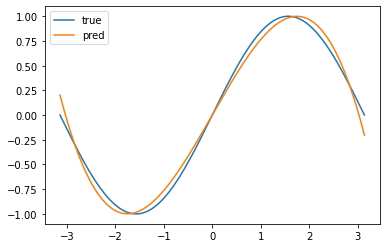

In [ ]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-3

start_time = datetime.now()
for t in range(20000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).mean()

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.

    grad_a, grad_b, grad_c, grad_d = torch.autograd.grad(loss, (a, b, c, d))

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd. Then manually zero the gradients after updating weights
    with torch.no_grad():
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c
        d -= learning_rate * grad_d

    

print(f"\nTrained in {datetime.now() - start_time}\n")
print(f'\nResult: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3\n')

plt.plot(x, y, label="true")
plt.plot(x, a.detach() + b.detach() * x + c.detach() * (x**2) + d.detach() * (x**3), label="pred")
plt.legend()

### PyTorch: Defining new autograd functions

Under the hood, each primitive autograd operator is really two functions that operate on Tensors. The forward function computes output Tensors from input Tensors. The backward function receives the gradient of the output Tensors with respect to some scalar value, and computes the gradient of the input Tensors with respect to that same scalar value.

In PyTorch we can easily define our own autograd operator by defining a subclass of torch.autograd.Function and implementing the forward and backward functions. We can then use our new autograd operator by constructing an instance and calling it like a function, passing Tensors containing input data.

In this example we define our model as y=a+bP3(c+dx) instead of y=a+bx+cx2+dx3, where P3(x)=12(5x3−3x) is the Legendre polynomial of degree three. We write our own custom autograd function for computing forward and backward of P3, and use it to implement our model:

In [ ]:
class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6

start_time = datetime.now()
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t+1, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f"\nTrained in {datetime.now() - start_time}\n")
print(f'\nResult: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)\n')

plt.plot(x, y, label="true")
plt.plot(x, a.detach() + b.detach() * LegendrePolynomial3.apply(c.detach() + d.detach() * x), label="pred")
plt.legend()

## `nn` Module

### PyTorch: `nn`

Computational graphs and autograd are a very powerful paradigm for defining complex operators and automatically taking derivatives; however for large neural networks raw autograd can be a bit too low-level.

When building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning.

In TensorFlow, packages like Keras, TensorFlow-Slim, and TFLearn provide higher-level abstractions over raw computational graphs that are useful for building neural networks.

In PyTorch, the nn package serves this same purpose. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

In this example we use the nn package to implement our polynomial model network:


Trained in 0:00:07.631718



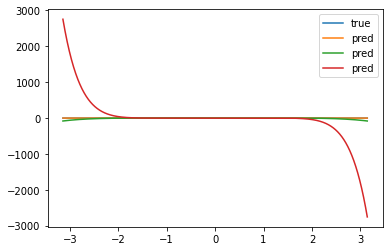

In [ ]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.

class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

model = MyModel()

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.

loss_fn = torch.nn.MSELoss()

learning_rate = 1e-3

start_time = datetime.now()
for t in range(20000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.

    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y, y_pred)

    # Zero the gradients before running the backward pass.
    
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad


print(f"\nTrained in {datetime.now() - start_time}\n")


# For linear layer, its parameters are stored as `weight` and `bias`.
# print(f'\nResult: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3\n')

plt.plot(x, y, label="true")
plt.plot(x, model(xx).detach(), label="pred")
plt.legend()

### PyTorch: optim

Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters with torch.no_grad(). This is not a huge burden for simple optimization algorithms like stochastic gradient descent, but in practice we often train neural networks using more sophisticated optimizers like AdaGrad, RMSProp, Adam, etc.

The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

In this example we will use the nn package to define our model as before, but we will optimize the model using the RMSprop algorithm provided by the optim package:


Trained in 0:00:11.577607



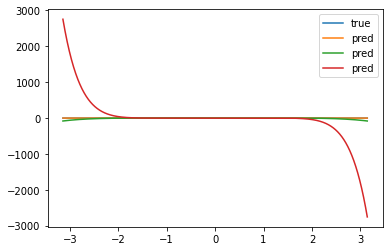

In [ ]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = MyModel()
loss_fn = torch.nn.MSELoss()

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer =  torch.optim.Adam(model.parameters(), lr=learning_rate)

start_time = datetime.now()
for t in range(20000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y, y_pred)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.

    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    
    optimizer.step()

print(f"\nTrained in {datetime.now() - start_time}\n")

plt.plot(x, y, label="true")
plt.plot(x, model(xx).detach(), label="pred")
plt.legend()

### PyTorch: Custom nn Modules

Sometimes you will want to specify models that are more complex than a sequence of existing Modules; for these cases you can define your own Modules by subclassing nn.Module and defining a forward which receives input Tensors and produces output Tensors using other modules or other autograd operations on Tensors.

In this example we implement our third order polynomial as a custom Module subclass:

99 1286.542724609375
199 907.7340087890625
299 641.4546508789062
399 454.2020263671875
499 322.4720153808594
599 229.7691192626953
699 164.50856018066406
799 118.55227661132812
899 86.18038940429688
999 63.37092590332031
1099 47.29500961303711
1199 35.961952209472656
1299 27.970590591430664
1399 22.334339141845703
1499 18.35830307006836
1599 15.552903175354004
1699 13.57308578491211
1799 12.175671577453613
1899 11.18917179107666
1999 10.492650032043457

Trained in 0:00:00.803607


Result: y = -0.04275578260421753 + 0.8503020405769348 x + 0.007376082707196474 x^2 + -0.09241452068090439 x^3



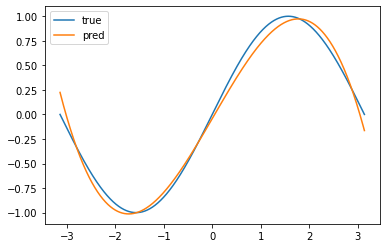

In [ ]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the nn.Linear
# module which is members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)

start_time = datetime.now()
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"\nTrained in {datetime.now() - start_time}\n")

print(f'\nResult: {model.string()}\n')

plt.plot(x, y, label="true")
plt.plot(x, model(x).detach(), label="pred")
plt.legend()

### PyTorch: Control Flow + Weight Sharing
As an example of dynamic graphs and weight sharing, we implement a very strange model: a third-fifth order polynomial that on each forward pass chooses a random number between 3 and 5 and uses that many orders, reusing the same weights multiple times to compute the fourth and fifth order.

For this model we can use normal Python flow control to implement the loop, and we can implement weight sharing by simply reusing the same parameter multiple times when defining the forward pass.

We can easily implement this model as a Module subclass:

1999 16.491897583007812
3999 12.564131736755371
5999 9.841315269470215
7999 9.076091766357422
9999 9.295665740966797
11999 8.664648056030273
13999 8.624119758605957
15999 8.57633113861084
17999 8.542036056518555
19999 8.567848205566406
21999 8.863239288330078
23999 8.853719711303711
25999 8.864386558532715
27999 8.551941871643066
29999 8.862436294555664

Trained in 0:00:15.567853


Result: y = 0.0011082780547440052 + 0.8579141497612 x + -0.0007485657697543502 x^2 + -0.09382084757089615 x^3 + 0.00019750789215322584 x^4 ? + 0.00019750789215322584 x^5 ?



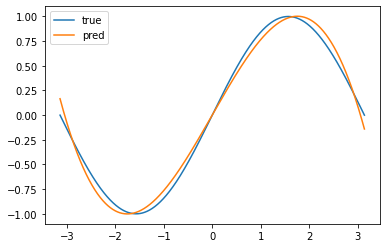

In [ ]:
class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)

start_time = datetime.now()
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"\nTrained in {datetime.now() - start_time}\n")

print(f'\nResult: {model.string()}\n')

plt.plot(x, y, label="true")
plt.plot(x, model(x).detach(), label="pred")
plt.legend()